Connecting with google drive

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as num


Loading the dataset

In [ ]:
drive.mount('/content/drive',force_remount=True)
path = "/content/drive" + "/My Drive/"+"myopia/myopia.csv"

Mounted at /content/drive


In [ ]:
data = pd.read_csv(path)
df = pd.DataFrame(data)
df.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [ ]:
df.columns
new_df=df.drop('ID',axis=1)
new_df.columns

Index(['STUDYYEAR', 'MYOPIC', 'AGE', 'GENDER', 'SPHEQ', 'AL', 'ACD', 'LT',
       'VCD', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR',
       'MOMMY', 'DADMY'],
      dtype='object')

Correlation

In [ ]:
class_var = 'MYOPIC'

correlation_class_1 = new_df.drop(columns=[class_var]).corrwith(new_df[class_var])

print(correlation_class_1)

STUDYYEAR    0.016331
AGE          0.018526
GENDER       0.061557
SPHEQ       -0.373639
AL           0.037752
ACD          0.107953
LT          -0.045704
VCD          0.011855
SPORTHR     -0.098282
READHR       0.072749
COMPHR       0.025874
STUDYHR     -0.031859
TVHR        -0.004032
DIOPTERHR    0.036984
MOMMY        0.134033
DADMY        0.149896
dtype: float64


Maximum correlation

In [ ]:
lst = [0.016331,0.018526,0.061557,-0.373639,0.037752,-0.045704,0.011855,-0.098282,0.025874,-0.031859,-0.004032,0.036984,0.149896,0.134033,0.107953, 0.072749]
lst.sort()
print(lst[::-1])

[0.149896, 0.134033, 0.107953, 0.072749, 0.061557, 0.037752, 0.036984, 0.025874, 0.018526, 0.016331, 0.011855, -0.004032, -0.031859, -0.045704, -0.098282, -0.373639]


Droping the unwanted columns

In [ ]:
to_drop = ['ID','STUDYYEAR','AGE','SPHEQ','AL','LT','VCD','SPORTHR','COMPHR','GENDER','READHR','DIOPTERHR']
final_df = df.drop(columns=to_drop, axis=1)
final_df

,MYOPIC,ACD,STUDYHR,TVHR,MOMMY,DADMY
0,1,3.690,0,10,1,1
1,0,3.702,1,7,1,1
2,0,3.462,0,10,0,0
3,1,3.862,0,4,0,1
4,0,3.676,0,4,1,0
...,...,...,...,...,...,...
613,1,3.663,3,14,1,0
614,0,3.570,0,8,1,1
615,0,3.624,0,4,1,1
616,0,3.688,0,15,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Training the regression model

In [ ]:
X = final_df[['STUDYHR', 'ACD', 'TVHR', 'MOMMY','DADMY']]
y = final_df['MYOPIC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
# Testing using training data
y_p_train = model.predict(X)
#print(X_train)
final_df['New_y'] = y_p_train
final_df


,MYOPIC,ACD,STUDYHR,TVHR,MOMMY,DADMY,New_y
0,1,3.690,0,10,1,1,0.247735
1,0,3.702,1,7,1,1,0.249927
2,0,3.462,0,10,0,0,0.022219
3,1,3.862,0,4,0,1,0.170481
4,0,3.676,0,4,1,0,0.143758
...,...,...,...,...,...,...,...
613,1,3.663,3,14,1,0,0.119290
614,0,3.570,0,8,1,1,0.242303
615,0,3.624,0,4,1,1,0.251875
616,0,3.688,0,15,0,0,0.030654


Updating the values based on range

In [ ]:
final_df['MYOPIC'] = final_df['MYOPIC'].astype(int)
#final_df.loc[2, 'MYOPIC'] = 0
for i in range(len(final_df['New_y'])):
  if final_df['New_y'][i]<0:
    final_df.loc[i, 'MYOPIC'] = 0
  elif final_df['New_y'][i]>=0.1 and final_df['New_y'][i]<0.16:
    final_df.loc[i, 'MYOPIC'] = 1
  elif final_df['New_y'][i]>=0.16 and final_df['New_y'][i]<0.20:
    final_df.loc[i, 'MYOPIC'] = 2
  elif final_df['New_y'][i]>=0.20 and final_df['New_y'][i]<0.26:
    final_df.loc[i, 'MYOPIC'] = 3
  elif final_df['New_y'][i]>=0.26 and final_df['New_y'][i]<0.31:
    final_df.loc[i, 'MYOPIC'] = 4
final_df

,MYOPIC,ACD,STUDYHR,TVHR,MOMMY,DADMY,New_y
0,3,3.690,0,10,1,1,0.247735
1,3,3.702,1,7,1,1,0.249927
2,0,3.462,0,10,0,0,0.022219
3,2,3.862,0,4,0,1,0.170481
4,1,3.676,0,4,1,0,0.143758
...,...,...,...,...,...,...,...
613,1,3.663,3,14,1,0,0.119290
614,3,3.570,0,8,1,1,0.242303
615,3,3.624,0,4,1,1,0.251875
616,0,3.688,0,15,0,0,0.030654


Replacing the column into the original dataset

In [ ]:
df['MYOPIC'] = final_df['MYOPIC']
df

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,3,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,3,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,2,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,1,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,614,1995,1,6,0,0.678,22.40,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,615,1993,3,6,1,0.665,22.50,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,616,1995,3,6,0,1.834,22.94,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,617,1991,0,6,1,0.665,21.92,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

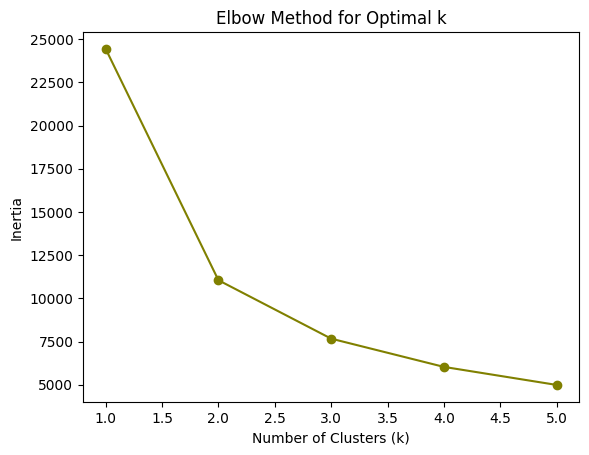

In [ ]:
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_df)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 6), inertia, marker='o', color='olive')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
X = df[['STUDYYEAR','AGE','GENDER','SPHEQ','AL','ACD','LT','VCD','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']]
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [ ]:
cluster_labels = kmeans.labels_
data['Cluster'] = cluster_labels

In [ ]:
cluster_sizes = data['Cluster'].value_counts().sort_index()
print(cluster_sizes)

Cluster
0     92
1     34
2    164
3    198
4    130
Name: count, dtype: int64


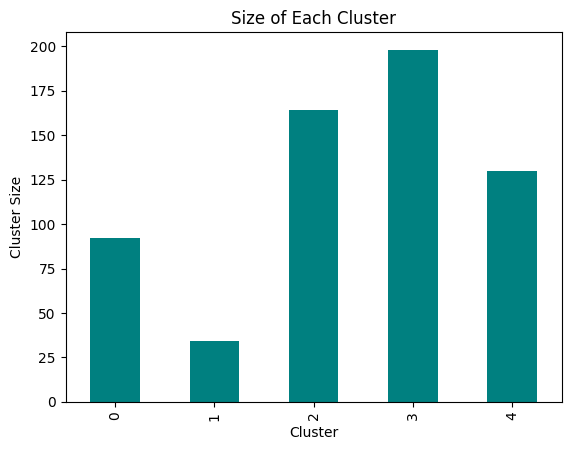

In [ ]:
cluster_sizes.plot(kind='bar',color='teal')
plt.xlabel('Cluster')
plt.ylabel('Cluster Size')
plt.title('Size of Each Cluster')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [ ]:
X = df[['STUDYYEAR','AGE','GENDER','SPHEQ','AL','ACD','LT','VCD','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']]

y = df['MYOPIC']
model = LinearRegression()
model.fit(X, y)
model.score(X,y)

0.1833348928587336

In [ ]:
len(X.columns)

16

In [ ]:
lst=['SPHEQ','AL','ACD','LT','VCD','SPORTHR','READHR','COMPHR','DIOPTERHR','MOMMY','DADMY']
lst1=[]
for i in lst:
  lst1.append(df[i].mean())
lst1

[0.8010097087378641,
 22.496779935275082,
 3.5786294498381874,
 3.5414530744336568,
 15.376779935275078,
 11.953074433656958,
 2.796116504854369,
 2.105177993527508,
 26.01779935275081,
 0.5064724919093851,
 0.49838187702265374]

In [ ]:
test_data = [1992	, 12,1	,0.8010097087378641	,22.496779935275082	,3.5786294498381874	,3.5414530744336568	,15.376779935275078	,11.953074433656958	,2.796116504854369	,2.105177993527508	,0	,10	,26.01779935275081	,0.5064724919093851	,0.49838187702265374]

In [ ]:
new_data = num.array(test_data)
new_predict_data = new_data.reshape(1,-1)
predictions = model.predict(new_predict_data)
print("The predicted Myopia Sevesity Level : " + str(round(predictions[0],0)))

The predicted Myopia Sevesity Level : 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
test_data[0] = int(input("Enter the year when you realised myopia: "))
test_data[1]=int(input("Enter your age: "))
test_data[11]=int(input("Enter approximate studytime: "))
test_data[12] = int(input("Enter approximate screentime: "))
test_data[2] = int(input("gender(1 for male 0 for female): "))
user_mail = input("Enter Your Email Address: ")

new_data = num.array(test_data)
new_predict_data = new_data.reshape(1,-1)

predictions = model.predict(new_predict_data)


prediction = round(predictions[0],0)
print(prediction)

if test_data[2] == 1:
  gen = "Male"
else:
  gen = "Female"

Enter the year when you realised myopia: 2012
Enter your age: 20
Enter approximate studytime: 8
Enter approximate screentime: 12
gender(1 for male 0 for female): 0
Enter Your Email Address: sanjanaunyala@gmail.com
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

def send_email(subject, message, to_email):
    gmail_user = 'oculensreport@gmail.com'
    gmail_password = 'Oculens@321'
    msg = MIMEMultipart()
    msg['From'] = gmail_user
    msg['To'] = to_email
    msg['Subject'] = subject
    msg.attach(MIMEText(message, 'plain'))
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()
    server.login(gmail_user, gmail_password)
    server.sendmail(gmail_user, to_email, msg.as_string())
    server.quit()

if __name__ == "__main__":
    to_email = user_mail
    subject = "Ocules - Report"
    message = f'''As per the given details by the patient: \n
    STUDYYEAR: {test_data[0]} \n
    AGE: {test_data[1]} \n
    STUDY TIME: {test_data[11]} \n
    SCREEN TIME: {test_data[12]} \n
    gender: {gen} \n
    The predicted Myopia Sevesity Level : {prediction}\n '''

    send_email(subject, message, to_email)
    print("Email sent successfully!")
